<h2 style = "color : Brown"> Linear Regression  bike_s Sharing Assignment </h2>

In [704]:
#Python libraries import
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [705]:
#Load csv file of loan dataset
df_origs = pd.read_csv('day.csv') 

In [706]:
#Read the first five rows
df_origs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [707]:
# Read data frame size
df_origs.shape


(730, 16)

In [708]:
bike_s = df_origs

####  Datatype and null values identification
- Check the datatypes of all the columns of the dataframe.
- And also the number of null values in the columns. 

In [709]:
bike_s.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No missing or nul values are found , no action be be taken

### Drop Unnecessary variables
    
 #### ‘instant’ , ‘dteday’ , ‘casual’ and ‘registered’
1. instant: Contains index values
2. dteday: Data set already contains year and month field
3. ‘casual’ and ‘registered' : Are not available initally also our concern will be 'cnt' 

In [710]:
#Remove customer behaviour variables 
not_needed_variables=['instant','dteday','casual','registered']
not_needed_variables
bike_s = bike_s.drop(not_needed_variables, axis = 1)
bike_s.shape

(730, 12)

In [711]:
bike_s.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [712]:
bike_s.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [713]:
# View unnique values of fileds
bike_s.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [714]:
bike_s["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [715]:
bike_s.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Histogram on dataset

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

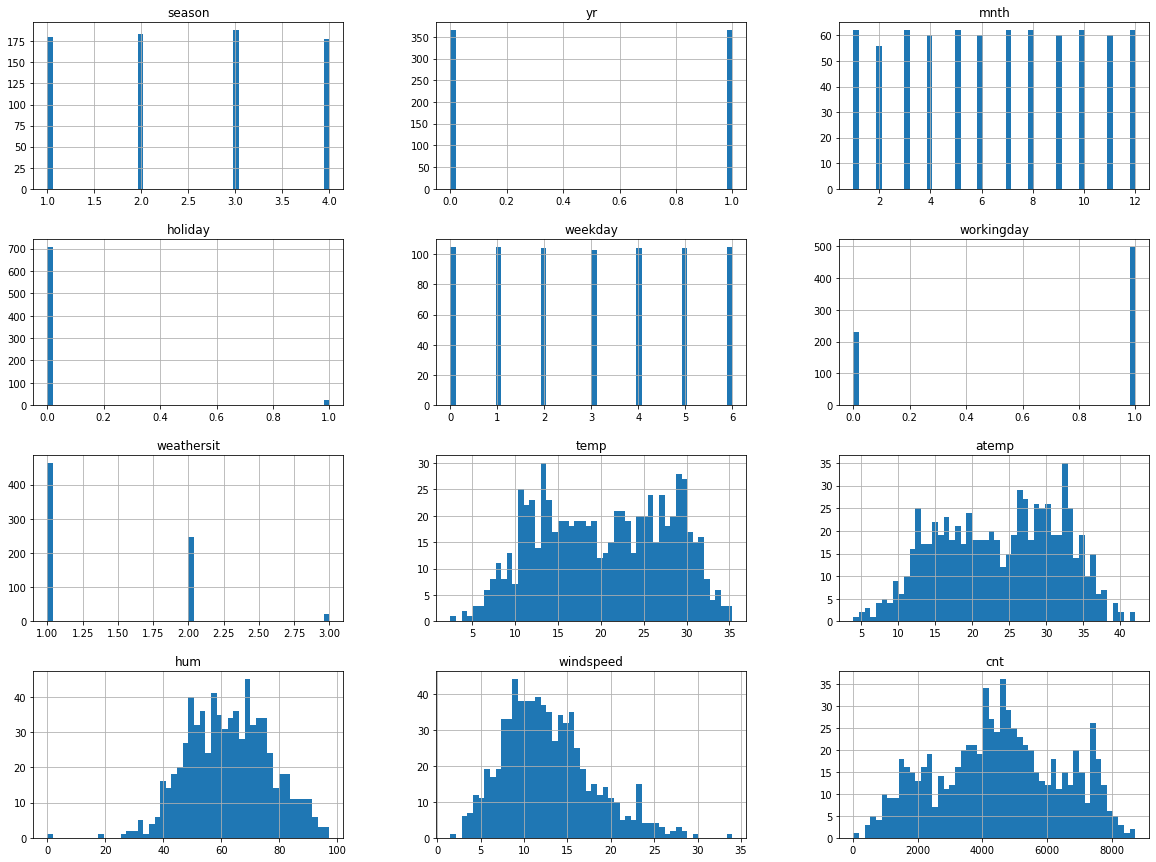

In [716]:
%matplotlib inline               
import matplotlib.pyplot as plt

bike_s.hist(bins=50,figsize=(20,15))  ## using panda function hist

### Relationship analysis on dataset

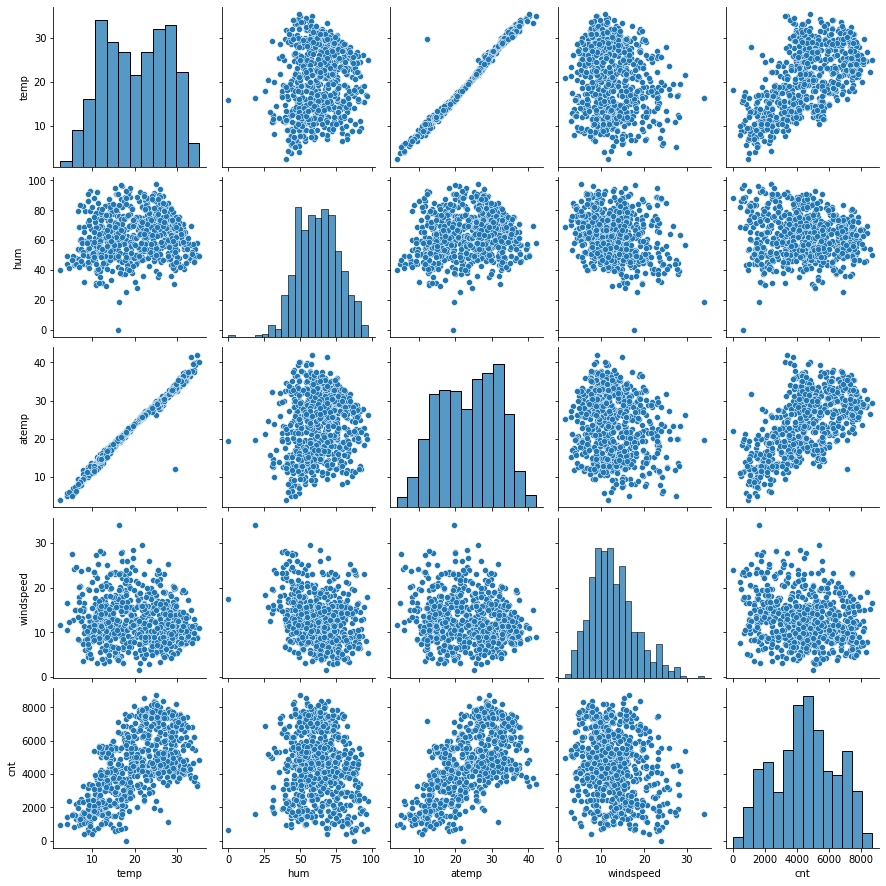

In [717]:
# Pairplot of numerical variables

sns.pairplot(bike_s, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

### Observation:
- The variables temp and atemp has a linear relationship between them.
- Also temp atemp shows a linear relationship towards cnt.

### Dummy Variables
#### Creation of dummy variables for categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [718]:
bike_s_1 = bike_s

# Convert to 'category' data type

bike_s_1['season']=bike_s_1['season'].astype('category')
bike_s_1['weathersit']=bike_s_1['weathersit'].astype('category')
bike_s_1['mnth']=bike_s_1['mnth'].astype('category')
bike_s_1['weekday']=bike_s_1['weekday'].astype('category')

In [719]:
bike_s_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [720]:
# Create Dummy variable
# Use Drop first to eliminate extra column

bike_s_2 = pd.get_dummies(bike_s_1, drop_first=True)
bike_s_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [721]:
bike_s_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [722]:
bike_s_2.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### cnt is the Dependent Variable (Y) 

### Split the bike_s data set
#### We will be using a ratio of 70:30
    -Train Data 70%
    -Test Data 30%

#### Use sklearn python library

In [723]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
trains_set, test_set = train_test_split(bike_s_2, train_size = 0.70, test_size = 0.30, random_state = 1000)

#### View Train and Test data size

In [724]:
trains_set.shape

(510, 30)

In [725]:
test_set.shape 

(219, 30)

In [726]:
bike_s_train_s = trains_set.copy()

### Exploratory data analysis on traning dataset ,  trains_set (bike_s_train_s)


In [727]:
bike_s_train_s.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.684314,20.356515,23.759650,63.156031,12.793186,4492.794118,0.266667,0.250980,...,0.076471,0.080392,0.141176,0.135294,0.137255,0.143137,0.152941,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.465245,7.508655,8.145204,14.100496,5.243032,1912.405515,0.442651,0.434003,...,0.266010,0.272166,0.348545,0.342373,0.344454,0.350557,0.360284,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,3.957390,4.941955,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.940000,16.926163,52.474150,9.041918,3214.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.363326,24.163125,63.604150,12.187601,4489.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.948962,30.547987,73.218750,15.657012,5902.500000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [728]:
corr_matrix = bike_s_train_s.corr()

In [729]:
corr_matrix["cnt"].sort_values(ascending=False)

cnt             1.000000
atemp           0.625301
temp            0.625167
yr              0.529040
season_3        0.336890
mnth_6          0.215336
mnth_8          0.167697
mnth_7          0.166234
mnth_5          0.161756
mnth_9          0.160819
season_2        0.148588
mnth_10         0.112500
season_4        0.086012
weekday_4       0.051234
workingday      0.051146
weekday_6       0.039785
weekday_5       0.026008
weekday_2       0.013062
mnth_11         0.003885
weekday_3      -0.016366
mnth_4         -0.026092
weekday_1      -0.042785
holiday        -0.079504
hum            -0.084551
mnth_3         -0.152588
mnth_12        -0.163909
weathersit_2   -0.174654
windspeed      -0.251209
weathersit_3   -0.260833
mnth_2         -0.267245
Name: cnt, dtype: float64

#### Note: atemp , temp shows strong corelation

#### Graphical Analysis numeric dataset

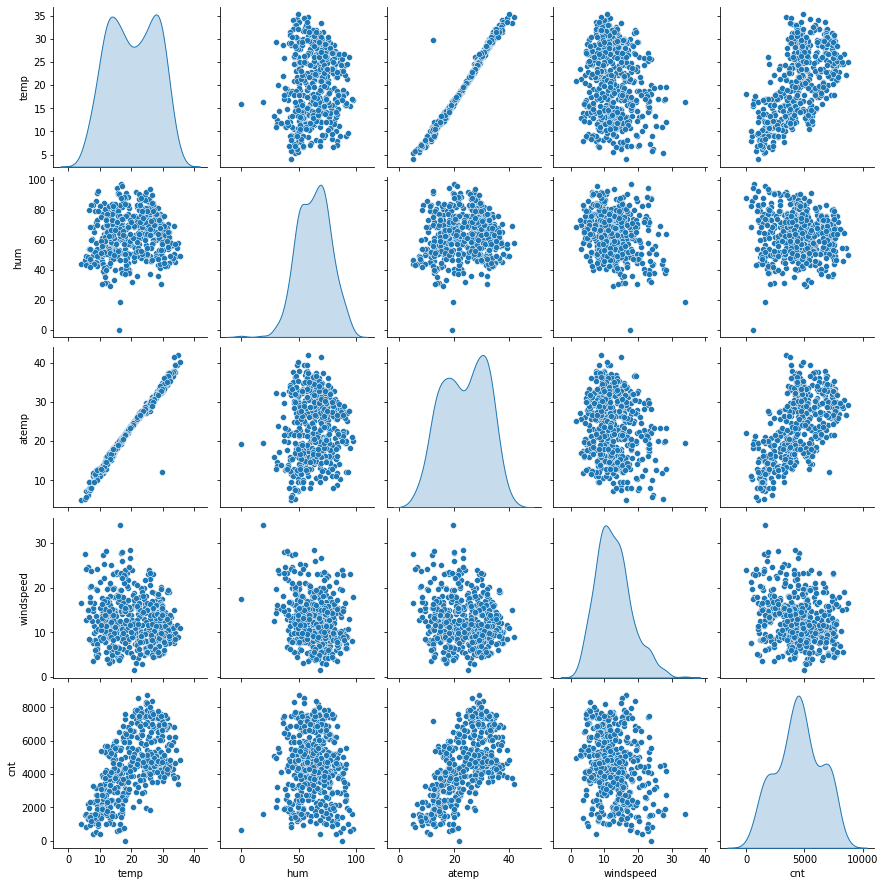

In [730]:
# pair plot using numeric variables

bike_s_train_s_num=bike_s_train_s[['temp','hum','atemp','windspeed','cnt']]

sns.pairplot(bike_s_train_s_num, diag_kind='kde')
plt.show()

#### Note: temp and atemp appears to be having Linear Relation

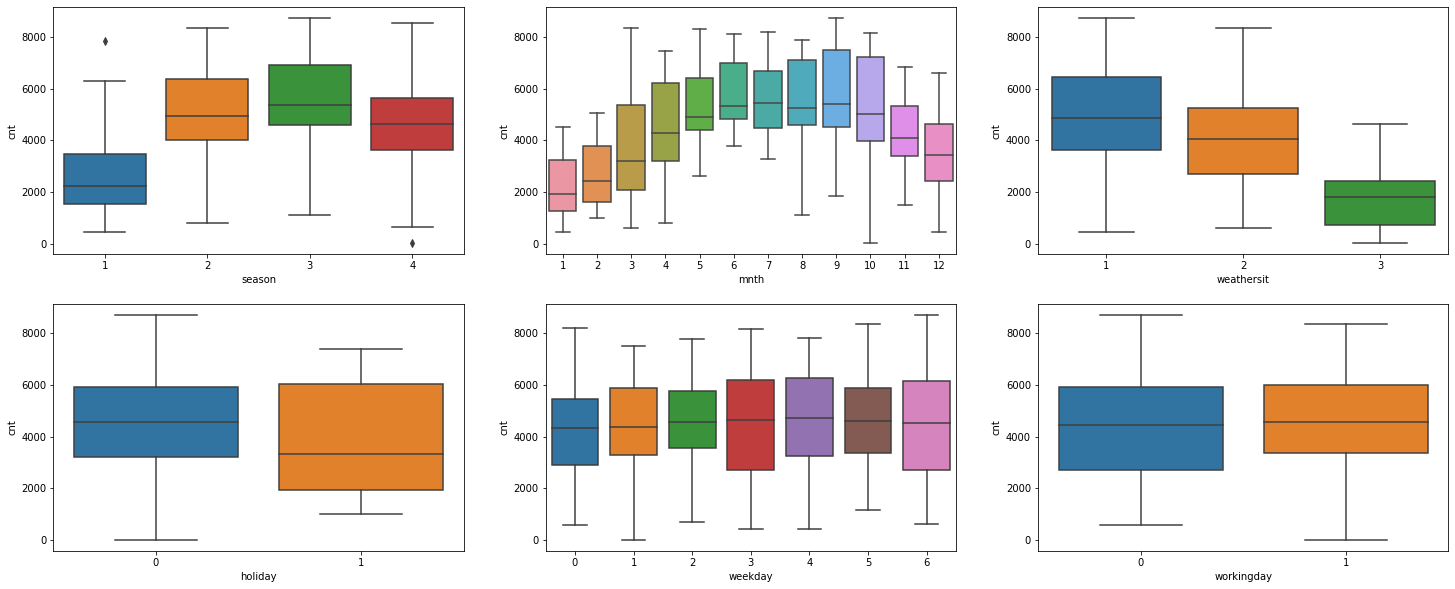

In [731]:
# Create boxplot for categorical variables againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_s)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_s)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_s)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_s)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_s)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_s)
plt.show()

#### Note:

- season: The season 2 and season 3 had a higher influence on the 'cnt'.
- mnth: Month 5 to Month 10 , seems to have higher booking .
- Weathersit: Weather of 1 & 2 has higher contribution to 'cnt'
- holiday: Its observed that majority of the bike_s booking were happening when it is not a holiday. Hence we can conclude that holiday cannot be a predicting value because of the bias.
- weekday: Shows similar results. 
- working : Working dat median closes in on 5000 , can be considered for prediction


###  Correlation Matrix

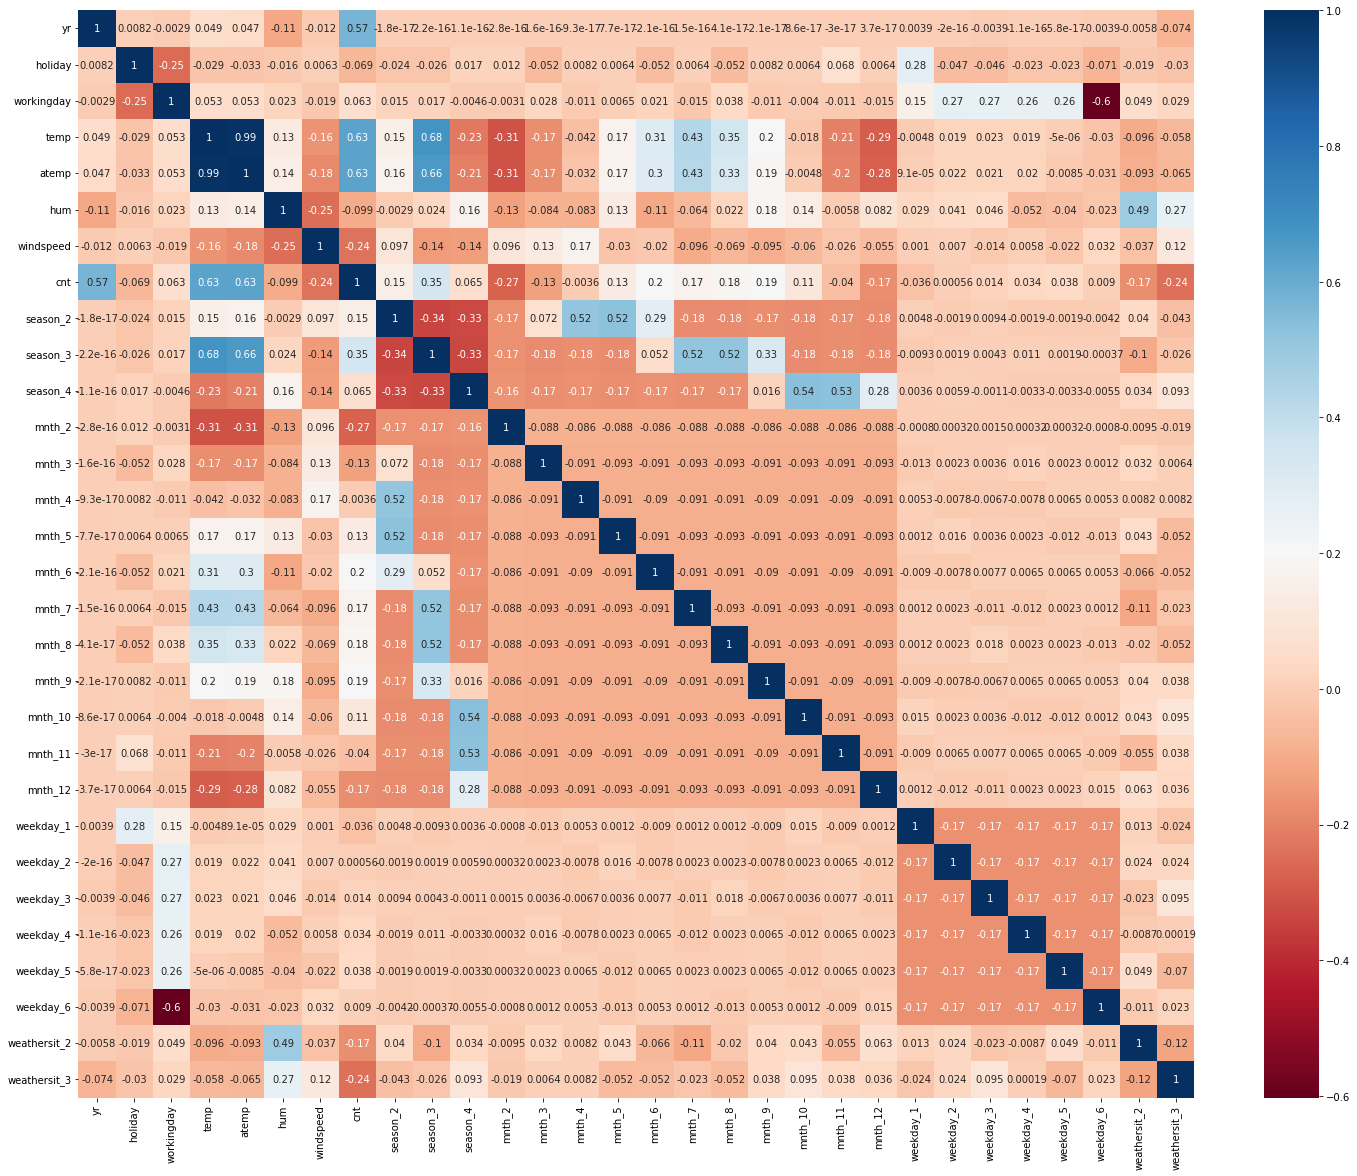

In [732]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_s_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_s_2.corr(), annot = True, cmap="RdBu")
plt.show()

#### Note :  temp and atemp has correlation of 0.63 , and both have correlation of 0.99 with cnt

In [733]:
#### Drop holiday to avoid multicollinearity and also since holiday will not be a factor in prediction
bike_s_train_s.drop(['holiday'],axis=1,inplace=True)


#### Rescaling of the features.

In [734]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [735]:
bike_s_train_s.columns


Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [736]:
bike_s_train_s.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,1,34.200847,39.33065,48.8750,11.082939,5463,0,1,0,...,0,0,0,0,0,0,1,0,0,0
674,1,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,1,...,1,0,0,1,0,0,0,0,0,0
477,1,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,27.880000,31.88145,51.3333,6.333731,5305,0,1,0,...,0,0,0,0,0,0,0,0,0,0
655,1,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [737]:
# Applying scaler function on the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_s_train_s[num_vars] = scaler.fit_transform(bike_s_train_s[num_vars])

In [738]:
bike_s_train_s.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,1,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,0,...,0,0,0,0,0,0,1,0,0,0
674,1,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,1,...,1,0,0,1,0,0,0,0,0,0
477,1,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,0,...,0,0,0,0,0,0,0,0,0,0
655,1,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [739]:
bike_s_train_s.describe()


,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.684314,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,0.233333,...,0.076471,0.080392,0.141176,0.135294,0.137255,0.143137,0.152941,0.149020,0.347059,0.027451
std,0.500491,0.465245,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,0.423368,...,0.266010,0.272166,0.348545,0.342373,0.344454,0.350557,0.360284,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build a Linear Model

#### Dividing the training data into X and y  sets for building of model
1. **Training data** - Used to train and fit the data to the algorithm.


2. **Testing data** - Used to test the data based on the trained data and evaluate the performance of the built model

In [740]:
y_train = bike_s_train_s.pop('cnt')
X_train = bike_s_train_s

### RFE Recursive feature elimination

In [741]:
# Import  RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [742]:
# Run RFE  
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)      # Output varibale 15 , reduce the number features to 15
rfe = rfe.fit(X_train, y_train)


In [743]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', False, 2),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [744]:
col = X_train.columns[rfe.support_]
 

In [745]:
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_4', 'mnth_5', 'mnth_9', 'weekday_1', 'weekday_2',
       'weathersit_3'],
      dtype='object')

In [746]:
X_train.columns[~rfe.support_]


Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [747]:
# Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [748]:
X_train_rfe.columns


Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_4', 'mnth_5', 'mnth_9', 'weekday_1', 'weekday_2',
       'weathersit_3'],
      dtype='object')

### Now Build Linear Model using the STATS MODEL

 #### Mode1 - VIF Check

In [749]:
# Analyse the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif dataframe will contain the names of all the feature variables and respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.11
3,hum,10.68
6,season_3,7.08
5,season_2,6.39
4,windspeed,4.48
1,workingday,3.45
7,season_4,2.52
8,mnth_4,2.13
9,mnth_5,2.08
0,yr,1.94


In [750]:
import statsmodels.api as sm

# Adding of constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [751]:
# identify parameters obtained

lr1.params

const           0.295424
yr              0.223394
workingday      0.009288
temp            0.495697
hum            -0.284470
windspeed      -0.161488
season_2        0.095074
season_3        0.062420
season_4        0.178984
mnth_4          0.024263
mnth_5          0.048682
mnth_9          0.101641
weekday_1      -0.036968
weekday_2      -0.017767
weathersit_3   -0.209689
dtype: float64

#### Model 1 Summary

In [752]:
# Summary of  linear regression model 1 obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.74e-176
Time:                        22:28:21   Log-Likelihood:                 491.12
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     495   BIC:                            -888.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2954      0.028     10.520   

#### Model 2

- Lets drop 'hum' due to the high VIF observed.


In [753]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)


In [754]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.29
5,season_3,6.89
4,season_2,6.36
3,windspeed,3.84
1,workingday,3.31
6,season_4,2.39
7,mnth_4,2.13
8,mnth_5,2.07
0,yr,1.90
11,weekday_2,1.30


In [755]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.26e-161
Time:                        22:28:21   Log-Likelihood:                 454.09
No. Observations:                 510   AIC:                            -880.2
Df Residuals:                     496   BIC:                            -820.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1035      0.019      5.451   

- Lets drop 'season_3' due to the high VIF observed.


#### Model 3

In [756]:
X_train_rfe3=X_train_rfe2.drop(['season_3'],axis=1)


In [757]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.23
4,season_2,3.66
3,windspeed,3.58
1,workingday,3.30
7,mnth_5,2.07
6,mnth_4,2.03
0,yr,1.88
5,season_4,1.33
10,weekday_2,1.30
9,weekday_1,1.26


In [758]:
# Adding a constant
X_train_lm3=sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

# Summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.84e-160
Time:                        22:28:21   Log-Likelihood:                 448.68
No. Observations:                 510   AIC:                            -871.4
Df Residuals:                     497   BIC:                            -816.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0943      0.019      4.976   

- Lets drop 'workingday' due to the high VIF observed.


#### Model 4

In [759]:
X_train_rfe4=X_train_rfe3.drop(['workingday'],axis=1)


In [760]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.80
2,windspeed,3.35
3,season_2,3.65
4,season_4,1.30
5,mnth_4,2.03
6,mnth_5,2.07
7,mnth_9,1.17
8,weekday_1,1.19
9,weekday_2,1.18


In [761]:
# adding constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# fiiting and running the model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.47e-161
Time:                        22:28:21   Log-Likelihood:                 448.07
No. Observations:                 510   AIC:                            -872.1
Df Residuals:                     498   BIC:                            -821.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1001      0.018      5.498   

- Need to drop 'weekday_1' due to high p-value

#### Model 5


In [762]:
X_train_rfe5=X_train_rfe4.drop(['weekday_1'],axis=1)


In [763]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.72
2,windspeed,3.32
3,season_2,3.65
4,season_4,1.30
5,mnth_4,2.03
6,mnth_5,2.07
7,mnth_9,1.17
8,weekday_2,1.16
9,weathersit_3,1.06


In [764]:
# adding constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# fitting and running model
lr5=sm.OLS(y_train,X_train_lm5).fit()

# summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.58e-160
Time:                        22:28:21   Log-Likelihood:                 443.46
No. Observations:                 510   AIC:                            -864.9
Df Residuals:                     499   BIC:                            -818.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0947      0.018      5.185   

- Dropping mnth_5 due to high p-value

#### Model 6

In [765]:
X_train_rfe6=X_train_rfe5.drop(['mnth_5'],axis=1)

In [766]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.72
2,windspeed,3.32
3,season_2,2.12
4,season_4,1.30
5,mnth_4,1.54
6,mnth_9,1.17
7,weekday_2,1.16
8,weathersit_3,1.06


In [767]:
# adding constant
X_train_lm6=sm.add_constant(X_train_rfe6)

# fitting and running model
lr6=sm.OLS(y_train,X_train_lm6).fit()

# summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.66e-161
Time:                        22:28:21   Log-Likelihood:                 443.00
No. Observations:                 510   AIC:                            -866.0
Df Residuals:                     500   BIC:                            -823.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0943      0.018      5.165   

- Dropping feature 'mnth_4' due to high p-value

### Model 7

In [768]:
X_train_rfe7=X_train_rfe6.drop(['mnth_4'],axis=1)

In [769]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.58
2,windspeed,3.21
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weekday_2,1.16
7,weathersit_3,1.06


In [770]:
# adding constant
X_train_lm7=sm.add_constant(X_train_rfe7)

# fitting and running model
lr7=sm.OLS(y_train,X_train_lm7).fit()

# summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     230.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.60e-162
Time:                        22:28:21   Log-Likelihood:                 442.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     501   BIC:                            -829.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.018      5.178   

- Dropping weekday_2 due to high p-value

### Model 8

In [771]:
X_train_rfe8.head()

,yr,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
544,1,0.964059,0.294854,0,0,0,0
674,1,0.240884,0.311545,0,1,0,0
477,1,0.294252,0.579511,1,0,0,0
176,0,0.762572,0.148724,0,0,0,0
655,1,0.556729,0.442296,0,1,0,0


In [772]:
X_train_rfe8=X_train_rfe7.drop(['weekday_2'],axis=1)

In [773]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.86
1,temp,3.55
2,windspeed,3.17
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weathersit_3,1.06


In [774]:
# adding constant
X_train_lm8=sm.add_constant(X_train_rfe8)

# fitting and running model
lr8=sm.OLS(y_train,X_train_lm8).fit()

# summary
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     263.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.24e-163
Time:                        22:28:22   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     502   BIC:                            -834.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.018      5.145   

### Note:

- The Model 8 gives optimal results for p-values and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.786 and 0.783 respectively.
- F-static is good enough, a good fitting of model is concluded.


## Residual Analysis of the train data



In [775]:
y_train_cnt = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

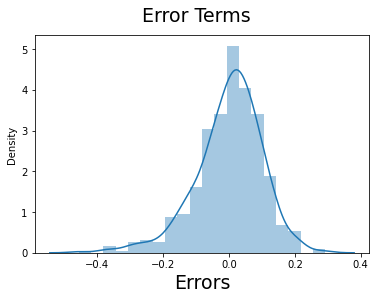

In [776]:
res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)                         # X-label

### Note:

- From the plot above, it us observed that the residuals are normally distributed therefore our assumption for linear regression is valid.

## Making Predictions Using the Final Model

- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr8)

In [777]:
# Now apply scaler() function to all the numeric variables in the test dataset.

numv = ['temp', 'atemp', 'hum', 'windspeed','cnt']

test_set[numv] = scaler.transform(test_set[numv])

In [778]:
test_set.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.390094,0.407020,0.781880,0.071811,0.461689,0,0,...,1,0,1,0,0,0,0,0,0,0
320,0,0,1,0.320391,0.302378,0.593387,0.583358,0.348711,0,0,...,1,0,0,0,0,1,0,0,1,0
189,0,0,0,0.832275,0.761827,0.627737,0.299998,0.611367,0,1,...,0,0,0,0,0,0,0,1,0,0
382,1,0,1,0.270290,0.237738,0.456848,0.810267,0.385872,0,0,...,0,0,0,0,1,0,0,0,0,0
388,1,0,1,0.321479,0.337264,0.861313,0.208991,0.496664,0,0,...,0,0,0,1,0,0,0,0,0,0


In [779]:
test_set.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.680365,0.518968,0.504278,0.638058,0.344287,0.519768,0.219178,0.273973,...,0.095890,0.095890,0.146119,0.159817,0.150685,0.141553,0.118721,0.132420,0.315068,0.031963
std,0.501140,0.188034,0.467403,0.240207,0.220975,0.149928,0.157137,0.229815,0.414637,0.447017,...,0.295115,0.295115,0.354034,0.367276,0.358561,0.349389,0.324202,0.339723,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.048868,-0.026641,0.261915,0.047450,0.069604,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311133,0.310028,0.521742,0.230151,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.534946,0.530399,0.621726,0.320521,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721730,0.683135,0.738729,0.433733,0.699896,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983663,0.950666,1.002146,0.864144,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [780]:
y_test = test_set.pop('cnt')
X_test = test_set
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [781]:
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [782]:
#Selecting the variables that were part of final model.
col_1=X_train_rfe8.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [783]:
# Making predictions using the final Model 8

y_pred = lr8.predict(X_test_lm8)

## Model Evaluation

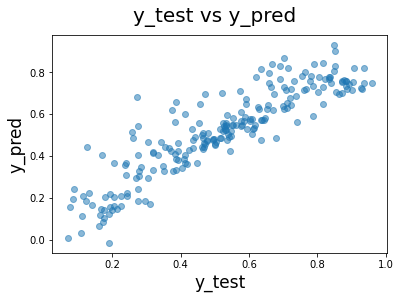

In [784]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()

### R-Squared value Test

In [785]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7996693605536902

### Adjusted R-Squared value Test

In [786]:
n = X_test.shape[0]
# Number of features
p = X_test.shape[1]

# Adjusted R-squared

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7930233203824857

## Conclusion:

### Final predictor variables:
 1   yr            
 2   temp        
 3   windspeed  
 4   season_2      
 5   season_4     
 6   mnth_9         
 7   weathersit_3  


### Top 3 predictor variables: 

- Temperature (temp) - A coefficient value of '0.5596'.

- Year (yr) - A coefficient value of '0.2266'.

- Weather Situation 3 (weathersit_3) - A coefficient value of '-0.2678'. This causes a decrease in bike_s hires by 0.2678 with a unit increase.

### Other suggested  predictor variables:

- season_4: - A coefficient value of '0.1386'.

- windspeed: - A coefficient value of '-0.1044'.